# ASSIGNMENT-2

Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.
<br>Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#datetime
import datetime as dt

#StandardSccaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans

**Reading the data**

In [2]:
#reading the data
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')

In [3]:
df.shape #Dimensions of the data

(2823, 25)

In [4]:
df.head() #Glimpse of the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Dropping columns **

In [5]:
#Removing the variables which dont add significant value fot the analysis.
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE']
df = df.drop(to_drop, axis=1)

**Checking for null values**

In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Not dealing with the mising values of 'Territory' Variable as it may not have a significant effect on the analysis.

**Checking for inconsistent data types**

In [7]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Changing the data type of variable 'ORDERDATE' from object to datetime

In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

**Summary stats of Quantitative variables**

In [9]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


It is observed that there are no negative values for the quantitative variables, which is a good sign because we cannot have negative prices or quantities.

# Segmentation with number of clusters chosen randomly

In [10]:
df['ORDERDATE'] = [d.date() for d in df['ORDERDATE']]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium


**Calculate Recency, Frequency and Monetary value for each customer**

Assuming that we are analyzing the next day of latest order date in the data set. Creating a variable '*snapshot date*****' which is the latest date in data set.

**Recency** : Recency is the number of days between the customer's latest order date and the snapshot date<br>
**Frequency**: Number of purchases made by the customer<br>
**MonetaryValue**: Revenue generated by the customer

In [11]:
# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)


In [12]:
df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


# Segmentation using KMeans Clustering

# Data Preprocessing for KMeans

**K Means Assumptions**

* All variables have symmetrical (Normal) Distribution <br>
* All Variables have same average value(approx)<br>
* All Variables have same variance(approx)

**Check the distribution of the variables **

In [13]:
data = df_RFM[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


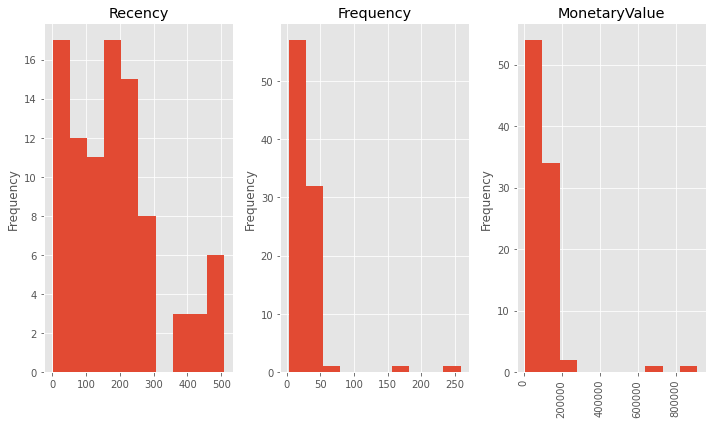

In [14]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
data['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
data['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
data['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

**Removing the skewness by performing log transformation on the variables**

In [15]:
data_log = np.log(data)

In [16]:
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


**Distribution of Recency, Frequency and MonetaryValue after Log Transformation**

c:\Users\Sauhard Saini\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Sauhard Saini\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Sauhard Saini\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

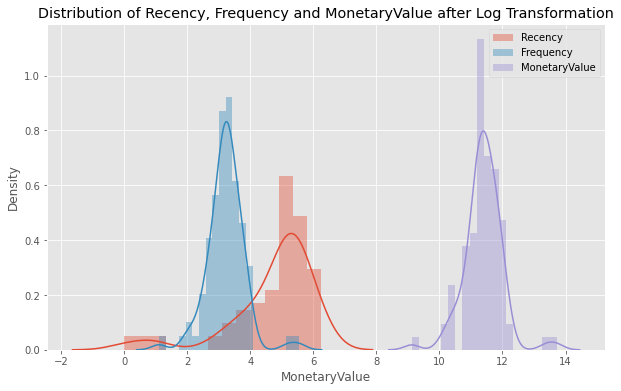

In [17]:
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
sns.distplot(data_log['Recency'],label='Recency')

#plt.subplot(1,3,1)
sns.distplot(data_log['Frequency'],label='Frequency')

#plt.subplot(1,3,1)
sns.distplot(data_log['MonetaryValue'],label='MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()

**Standardizing the variables using StandardScaler() for equal variance and mean**

In [18]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


# Choosing number of Clusters using Elbow Method

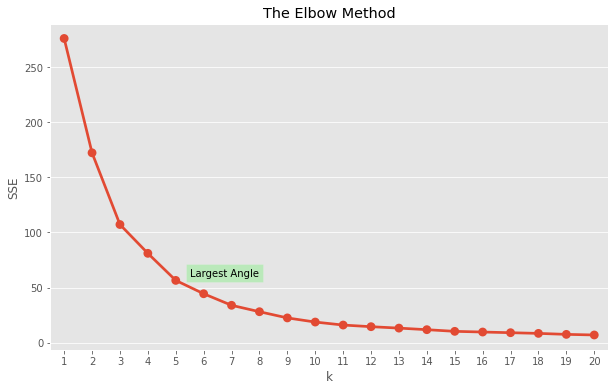

In [19]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

# Running KMeans with 5 clusters

In [20]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = data.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2


In [21]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         209.2      22.1       78633.2    43
1           2.0      38.8      132201.6     4
2         324.2      10.7       35628.7    12
3         126.5      37.1      133158.0    31
4           2.0     219.5      783576.1     2

# Calculating relative importance of each attribute

In [22]:
# Calculate average RFM values for each cluster
cluster_avg = data_rfm.groupby(['Cluster']).mean() 
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0        209.162791   22.093023   78633.205814
1          2.000000   38.750000  132201.635000
2        324.250000   10.666667   35628.653333
3        126.548387   37.129032  133158.014516
4          2.000000  219.500000  783576.085000


In [23]:
# Calculate average RFM values for the total customer population
population_avg = data.mean()
print(population_avg)

Recency             182.826087
Frequency            30.684783
MonetaryValue    109050.313587
dtype: float64


In [24]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.14      -0.28          -0.28
1          -0.99       0.26           0.21
2           0.77      -0.65          -0.67
3          -0.31       0.21           0.22
4          -0.99       6.15           6.19


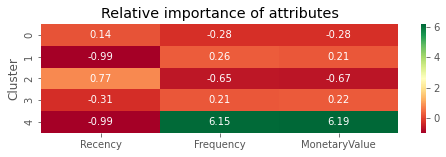

In [25]:
#Plot Relative Importance

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()